In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

from dust_attenuation.C00 import C00


<IPython.core.display.Javascript object>


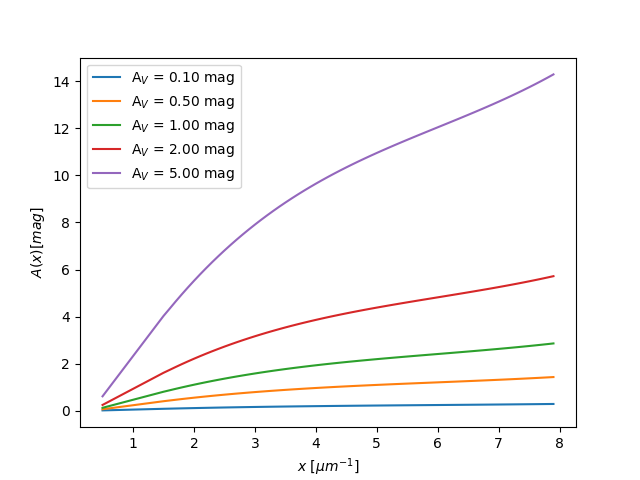

In [3]:
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,8.0,0.1)/u.micron


Avs = [0.1,0.5,1.0,2.0,5.0]
for cur_Av in Avs:
    att_model = C00(Av=cur_Av)
    ax.plot(x,att_model(x),label=r'A$_V$ = %.2f mag' % (cur_Av))

    ax.set_xlabel('$x$ [$\mu m^{-1}$]')
    ax.set_ylabel('$A(x) [mag]$')

    ax.legend(loc='best')


# Comparing with formula in CIGALE

In [4]:
def k_calzetti2000(wavelength):
    """Compute the Calzetti et al. (2000) A(λ)/E(B-V)∗

    Given a wavelength grid, this function computes the selective attenuation
    A(λ)/E(B-V)∗ using the formula from Calzetti at al. (2000). This formula
    is given for wavelengths between 120 nm and 2200 nm, but this function
    makes the computation outside.

    Parameters
    ----------
    wavelength: array of floats
        Wavelength grid in nm.

    Returns
    -------
    a numpy array of floats

    """
    wavelength = np.array(wavelength)
    result = np.zeros(len(wavelength))

    # Attenuation between 120 nm and 630 nm
    mask = (wavelength < 630)
    result[mask] = 2.659 * (-2.156 + 1.509e3 / wavelength[mask] -
                            0.198e6 / wavelength[mask] ** 2 +
                            0.011e9 / wavelength[mask] ** 3) + 4.05

    # Attenuation between 630 nm and 2200 nm
    mask = (wavelength >= 630)
    result[mask] = 2.659 * (-1.857 + 1.040e3 / wavelength[mask]) + 4.05

    return result

<IPython.core.display.Javascript object>


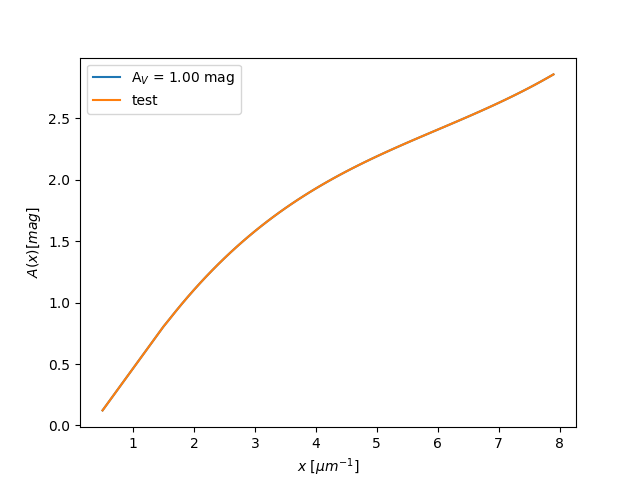

In [5]:
fig, ax = plt.subplots()

# generate the curves and plot them
x = np.arange(0.5,8.0,0.1)/u.micron
wvl=1e3/np.arange(0.5,8.0,0.1)

Avs = [1.0]
for cur_Av in Avs:
    att_model = C00(Av=cur_Av)
    ax.plot(x,att_model(x),label=r'A$_V$ = %.2f mag' % (cur_Av))
    ax.plot(x,k_calzetti2000(wvl)/4.05,label='test')
    ax.set_xlabel('$x$ [$\mu m^{-1}$]')
    ax.set_ylabel('$A(x) [mag]$')

    ax.legend(loc='best')


# Fitting example

<IPython.core.display.Javascript object>


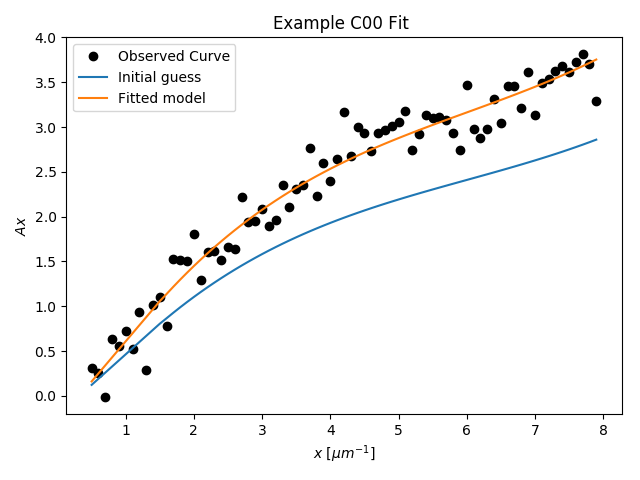

In [7]:
from astropy.modeling.fitting import LevMarLSQFitter

from dust_attenuation.C00 import C00

x = np.arange(0.5,8.0,0.1)/u.micron

att_model = C00(Av=1.3)
y = att_model(x)

# add some noise 
noise = np.random.normal(0, 0.2, y.shape)

y+=noise
# initialize the model
c00_init = C00()

# pick the fitter
fit = LevMarLSQFitter()

# fit the data to the FM90 model using the fitter
#   use the initialized model as the starting point
c00_fit = fit(c00_init, x.value, y)

# plot the observed data, initial guess, and final fit
fig, ax = plt.subplots()

ax.plot(x, y, 'ko', label='Observed Curve')
ax.plot(x.value, c00_init(x.value), label='Initial guess')
ax.plot(x.value, c00_fit(x.value), label='Fitted model')

ax.set_xlabel('$x$ [$\mu m^{-1}$]')
ax.set_ylabel('$Ax $')

ax.set_title('Example C00 Fit ')

ax.legend(loc='best')
plt.tight_layout()
plt.show()